In [45]:
import matplotlib.pyplot as plt
import json

file_train = open('./data/sg_train_annotations.json')
train_annotations = json.load(file_train)
file_train.close()

file_test = open('./data/sg_test_annotations.json')
test_annotations = json.load(file_test)
file_test.close()

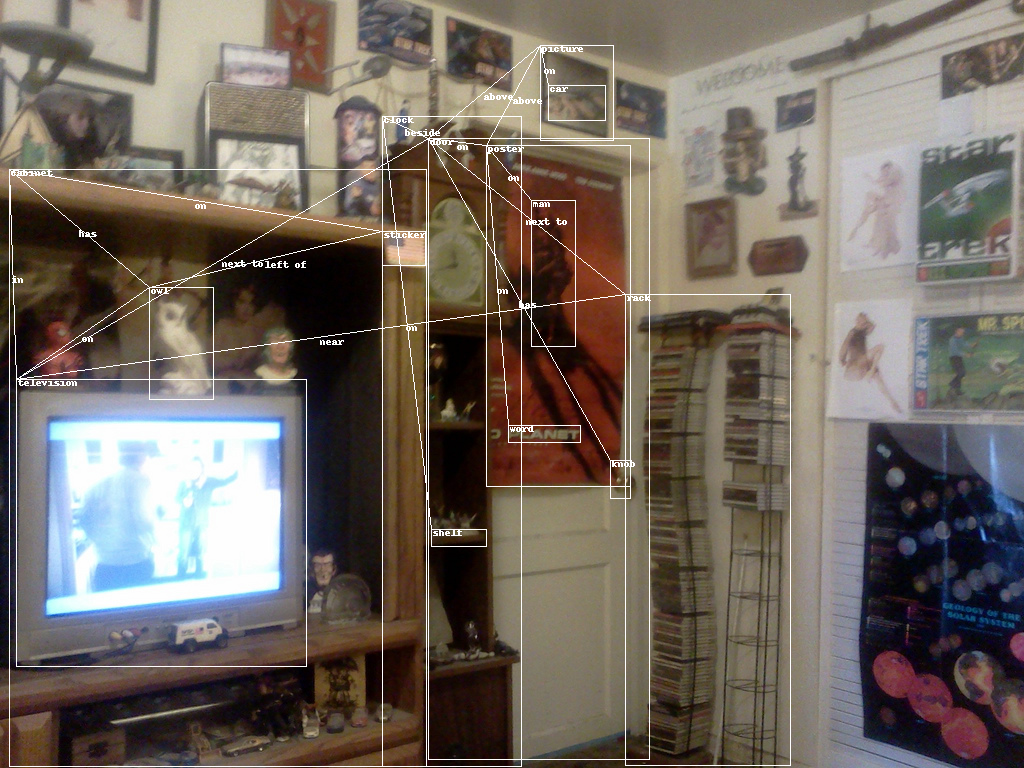

In [113]:
import random
from PIL import Image, ImageDraw

annotation = random.choice(train_annotations)
img = Image.open('./data/train/'+annotation['filename']).convert('RGBA')

img_annotations = Image.new('RGBA', img.size, (255,255,255,0))
d = ImageDraw.Draw(img_annotations)

def bbox_to_points(bbox):
    return [bbox['x'], bbox['y'], bbox['x']+bbox['w'], bbox['y']+bbox['h']]

for obj in annotation['objects']:
    bbox = obj['bbox']
    d.rectangle(bbox_to_points(bbox))
    d.text([bbox['x'] + 2, bbox['y'] - 2], '/'.join(obj['names']))

for relationship in annotation['relationships']:
    subj, obj = relationship['objects']
    relationship_txt = relationship['relationship']
    subj_point = (annotation['objects'][subj]['bbox']['x'], annotation['objects'][subj]['bbox']['y'])
    obj_point = (annotation['objects'][obj]['bbox']['x'], annotation['objects'][obj]['bbox']['y'])
    d.line([subj_point, obj_point], width=1)
    d.text([(subj_point[0] + obj_point[0]) / 2, (subj_point[1] + obj_point[1]) / 2], relationship_txt)
    
Image.alpha_composite(img, img_annotations)